In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import os
import re
import nibabel as nib
import numpy as np
from shutil import copyfile

# CEL dataset

In [2]:
visms_path = '/media/transcend/MSReports/CEL/CEL_train/VISMS/'
final_path = '/media/transcend/ContinualLearning/CEL/'

t1_name = 't1.nii.gz'
t1c_name = 't1c.nii.gz'
flair_name = 'flair.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

visms_sub = [sub for sub in os.listdir(visms_path) if os.path.isdir(os.path.join(visms_path, sub))]

for si, sub in enumerate(sorted(visms_sub)):
    sub_code = int(re.search(r'\d+', sub).group())
    origin = os.path.join(visms_path, sub)
    destination = os.path.join(final_path, 'sub-VIS{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(visms_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t.lower()))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, t1_name),
            os.path.join(t_destination, t1_name)
        )
        copyfile(
            os.path.join(t_origin, t1c_name),
            os.path.join(t_destination, t1c_name)
        )
        copyfile(
            os.path.join(t_origin, flair_name),
            os.path.join(t_destination, flair_name)
        )
        copyfile(
            os.path.join(t_origin, gt_name),
            os.path.join(t_destination, 'manual_mask.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, brain_name),
            os.path.join(t_destination, brain_name)
        )

In [3]:
b0_path = '/media/transcend/MSReports/CEL/CEL_train/Batch0/'
final_path = '/media/transcend/ContinualLearning/CEL/'

b0_sub = [sub for sub in os.listdir(b0_path) if os.path.isdir(os.path.join(b0_path, sub))]

t1_name = 't1.nii.gz'
t1c_name = 't1c.nii.gz'
flair_name = 'flair.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(b0_sub)):
    sub_code = int(sub)
    origin = os.path.join(b0_path, sub)
    destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(b0_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, t1_name),
            os.path.join(t_destination, t1_name)
        )
        copyfile(
            os.path.join(t_origin, t1c_name),
            os.path.join(t_destination, t1c_name)
        )
        copyfile(
            os.path.join(t_origin, flair_name),
            os.path.join(t_destination, flair_name)
        )
        copyfile(
            os.path.join(t_origin, gt_name),
            os.path.join(t_destination, 'manual_mask.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, brain_name),
            os.path.join(t_destination, brain_name)
        )

In [4]:
test_path = '/media/transcend/MSReports/CEL/CEL_testing/'
final_path = '/media/transcend/ContinualLearning/CEL/'

test_sub = [sub for sub in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, sub))]

t1_name = 'T1_pre_reg2_T1_post.nii.gz'
t1c_name = 'T1_post.nii.gz'
flair_name = 'FLAIR_reg2_T1_post.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'T1_post_brain_mask.nii.gz'

for si, sub in enumerate(sorted(test_sub)):
    sub_code = int(sub)
    origin = os.path.join(test_path, sub)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    volumes = []
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(test_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        mask_nii = nib.load(os.path.join(t_origin, gt_name))
        volumes.append(np.sum(mask_nii.get_fdata()) > 0)
    positive = np.any(volumes)
    if positive:       
        destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    for ti, (t, pos_t) in enumerate(zip(timepoints, volumes)):
        if (positive and pos_t) or not positive:
            t_origin = os.path.join(origin, t)
            t_destination = os.path.join(destination, 'ses-{:}'.format(t))
            if not os.path.exists(t_destination):
                os.mkdir(t_destination)
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1_name)),
                os.path.join(t_destination, 't1.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1c_name)),
                os.path.join(t_destination, 't1c.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, flair_name)),
                os.path.join(t_destination, 'flair.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, gt_name),
                os.path.join(t_destination, 'manual_mask.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)),
                os.path.join(t_destination, 'brain_mask.nii.gz')
            )
                

In [5]:
neg_path = '/media/transcend/MSReports/CEL/NoCEL/'
final_path = '/media/transcend/ContinualLearning/CEL/'

neg_sub = [sub for sub in os.listdir(neg_path) if os.path.isdir(os.path.join(neg_path, sub))]

t1_name = 'T1_pre_reg2_T1_post.nii.gz'
t1c_name = 'T1_post.nii.gz'
flair_name = 'FLAIR_reg2_T1_post.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'T1_post_brain_mask.nii.gz'

for si, sub in enumerate(sorted(neg_sub)):
    sub_code = int(sub)
    origin = os.path.join(neg_path, sub)
    destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(neg_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1_name)),
            os.path.join(t_destination, 't1.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1c_name)),
            os.path.join(t_destination, 't1c.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, flair_name)),
            os.path.join(t_destination, 'flair.nii.gz')
        )
        mask_nii = nib.load(os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)))
        no_mask = np.zeros_like(mask_nii.get_fdata())
        mask_nii = nib.Nifti1Image(no_mask, mask_nii.get_qform(), mask_nii.header)
        mask_nii.to_filename(os.path.join(t_destination, 'manual_mask.nii.gz'))
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)),
            os.path.join(t_destination, 'brain_mask.nii.gz')
        )

# Activity dataset

In [2]:
msseg_path = '/media/transcend/MSReports/Longitudinal/MICCAI_Challenge2021/training/'
final_path = '/media/transcend/ContinualLearning/Activity/'

msseg_sub = [
    sub for sub in os.listdir(msseg_path)
    if os.path.isdir(os.path.join(msseg_path, sub)) and 'CLARA' not in sub
]

flair1_name = 'flair_time01_on_middle_space_n4.nii.gz'
flair2_name = 'flair_time02_on_middle_space_n4.nii.gz'
gt_name = 'ground_truth.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(msseg_sub)):
    sub_code = int(sub)
    origin = os.path.join(msseg_path, sub)
    mask_nii = nib.load(os.path.join(origin, gt_name))
    positive = np.sum(mask_nii.get_fdata()) > 0   
    if positive:       
        destination = os.path.join(final_path, 'sub-CHP{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-CHN{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(msseg_sub),
        ), end='\r'
    )
    copyfile(
        os.path.join(origin, flair1_name),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(origin, flair2_name),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [3]:
train_path = '/media/transcend/MSReports/Longitudinal/MICCAI_Challenge2021/private/'
final_path = '/media/transcend/ContinualLearning/Activity/'

train_sub = [
    sub for sub in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, sub))
]

flair1_name = 'flair_time01_on_middle_space_n4.nii.gz'
flair2_name = 'flair_time02_on_middle_space_n4.nii.gz'
gt_name = 'ground_truth.nii.gz'
brain_name = 'brain_mask.nii.gz'

conversion_dict = {
    'GE': 'G3T',
    'P1': 'P1T',
    'P3': 'P3T',
    'S3': 'S3T'
}

for si, sub in enumerate(sorted(train_sub)):
    sub_acq, sub_code = sub.split('_')
    origin = os.path.join(train_path, sub)
    destination = os.path.join(
        final_path, 'sub-{:}{:05d}'.format(conversion_dict[sub_acq], int(sub_code))
    )
    if not os.path.exists(destination):
        os.mkdir(destination)
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(train_sub),
        ), end='\r'
    )
    copyfile(
        os.path.join(origin, flair1_name),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(origin, flair2_name),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [7]:
test_path = '/media/transcend/MSReports/Longitudinal/Longitudinal_testing'
final_path = '/media/transcend/ContinualLearning/Activity/'

test_sub = [
    sub for sub in os.listdir(test_path)
    if os.path.isdir(os.path.join(test_path, sub))
]

gt_name = 'positive_activity_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(test_sub)):
    sub_code = int(sub)
    origin = os.path.join(test_path, sub)
    timepoints = sorted([t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))])
    t = timepoints[-1]
    bl = timepoints[0]
    t_origin = os.path.join(origin, t)
    
    mask_nii = nib.load(os.path.join(t_origin, gt_name))
    positive = np.sum(mask_nii.get_fdata()) > 0
    
    if positive:       
        destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(test_sub),
        ), end='\r'
    )
        
    copyfile(
        os.path.join(t_origin, '{:}_{:}_FLAIR_reg2_{:}.nii.gz'.format(sub, bl, t)),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, '{:}_{:}_FLAIR_n4.nii.gz'.format(sub, t)),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [37]:
import os
import numpy as np
import time
import datasets
import models
import yaml
with open('/media/transcend/IncrementalLearning/cel_unet.yml', 'r') as stream:
    try:
        config = yaml.load(stream, Loader=yaml.FullLoader)
    except yaml.YAMLError as exc:
        print(exc)
print(config)

{'path': '/media/transcend/IncrementalLearning/CEL', 'files': ['t1.nii.gz', 't1c.nii.gz', 'flair.nii.gz'], 'roi': 'brain_mask.nii.gz', 'labels': 'manual_mask.nii.gz', 'multisession': True, 'task_size': 10, 'training': <class 'datasets.ImageCroppingDataset'>, 'validation': <class 'datasets.ImageDataset'>, 'patch_size': 32, 'train_batch': 32, 'network': <class 'models.DualHeadedUNet'>, 'filters': [8, 16, 32, 64, 128, 256, 512], 'seeds': [42, 80702, 74794, 62021, 48497], 'val_rate': 0.1, 'epochs': 25, 'patience': 10, 'output_path': '/media/transcend/IncrementalLearning/Models', 'model_name': 'cel_unet', 'folds': 5}


In [40]:
from utils import time_to_string, get_mask, get_normalised_image, find_file

def get_dataset(experiment_config, subject_list):
    d_path = experiment_config['path']
    load_start = time.time()
    
    subjects = []
    labels = []
    rois = []
    for pi, p in enumerate(subject_list):
        p_path = os.path.join(d_path, p)
        loads = len(subject_list) - pi
        load_elapsed = time.time() - load_start
        load_eta = loads * load_elapsed / (pi + 1)
        if config['multisession']:
            sessions = [
                session for session in os.listdir(p_path)
                if os.path.isdir(os.path.join(p_path, session))
            ]
            for si, session in enumerate(sessions):                
                print(' '.join([' '] * 300), end='\r')
                print(
                    'Loading subject {:} [{:}] ({:d}/{:d} - {:d}/{:d}) '
                    '{:} ETA {:}'.format(
                        p, session, pi + 1, len(subjects),
                        si + 1, len(sessions),
                        time_to_string(load_elapsed),
                        time_to_string(load_eta),
                    ), end='\r'
                )
                s_path = os.path.join(p_path, session)
                roi.append(get_mask(find_file(config['roi'], s_path)))
                labels.append(get_mask(find_file(config['labels'], s_path)))
                if isinstance(config['files'], tuple):
                    images = tuple(load_image_list(s_path, file_i, roi) for file_i in config['files'])
                else:
                    images = load_image_list(s_path, config['files'], roi)
                subjects.append(images)
        else:
            print(' '.join([' '] * 300), end='\r')
            print(
                'Loading subject {:} ({:d}/{:d}) '
                '{:} ETA {:}'.format(
                    p, pi + 1, len(subjects),
                    time_to_string(load_elapsed),
                    time_to_string(load_eta),
                ), end='\r'
            )
            roi.append(get_mask(find_file(config['roi'], p_path)))
            labels.append(get_mask(find_file(config['labels'], p_path)))
            if isinstance(config['files'], tuple):
                images = tuple(load_image_list(p_path, file_i, roi) for file_i in config['files'])
            else:
                images = load_image_list(p_path, config['files'], roi)
            subjects.append(images)

    return subjects, labels, rois

def load_image_list(path, image_list, roi):
    images = [
        get_normalised_image(os.path.join(path, image), roi)
        for image in image_list
    ]
    
    return np.stack(images)

In [43]:
def get_subjects(experiment_config):
    d_path = experiment_config['path']
    multitask = False
    task = 'Continuum'
    tasks = [task]
    try:
        if config['tasks'] is not None:
            multitask = True
            tasks = config['tasks']
    except KeyError:
        pass
    
    subjects = [
        patient for patient in os.listdir(d_path)
        if os.path.isdir(os.path.join(d_path, patient))
    ]
    subject_dicts = {
        task: [] for task in tasks
    }
    load_start = time.time()
    for pi, p in enumerate(subjects):
        if multitask:
            for task in tasks:
                if task in p:
                    break
        p_path = os.path.join(d_path, p)
        subject_dicts[task].append(p)
    return subject_dicts

In [57]:
subjects = get_subjects(config)

shuffled_subjects = np.random.permutation(subjects['Continuum'])
training_validation = [
    len(array.tolist())
    for array in np.array_split(
        shuffled_subjects,
        len(shuffled_subjects) // 20
    )
]
print(training_validation)

[21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [58]:
if isinstance(config['files'], tuple):
    n_images = len(config['files'][0])
else:
    n_images = len(config['files']) 
net = config['network'](
    conv_filters=config['filters'],
    n_images=n_images
)

0.0 103284.148081526 1106.0362912717487


<AxesSubplot:>

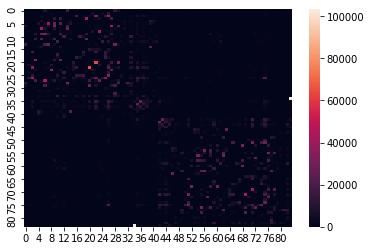

In [27]:
import csv
import pandas as pd
import seaborn as sn
csv_path = '/home/mariano/data/connectome/009_Pre_DK_NoAblation_Connectome.csv'
connectome = np.genfromtxt(csv_path, delimiter=',')
mask = np.zeros_like(connectome).astype(bool)
mask[np.triu_indices_from(mask)] = True
print(np.min(connectome[mask]), np.max(connectome[mask]), np.mean(connectome[mask]))
sn.heatmap(connectome)

In [34]:
import os
print(os.path.splitext(os.path.basename(csv_path))[0])

009_Pre_DK_NoAblation_Connectome


In [50]:
import re
print(re.search(r'\d+', 'a'))

None


<IPython.core.display.Javascript object>


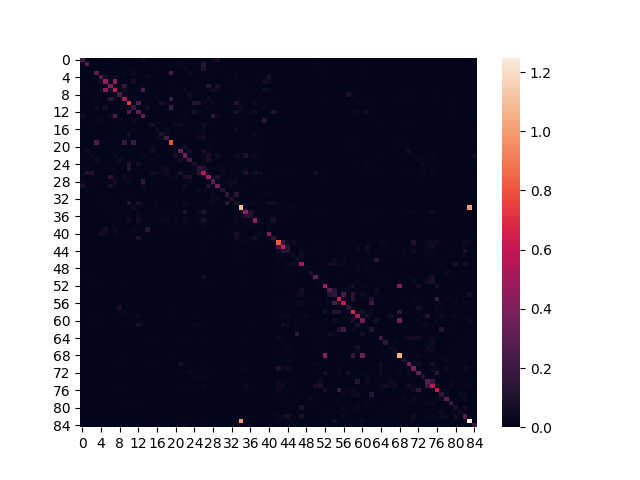

(85, 2)
[7, 0, 1, 2, 3, 4, 6, 8, 9, 11, 14, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 17, 24, 25, 33, 5, 13, 10, 12]


<IPython.core.display.Javascript object>


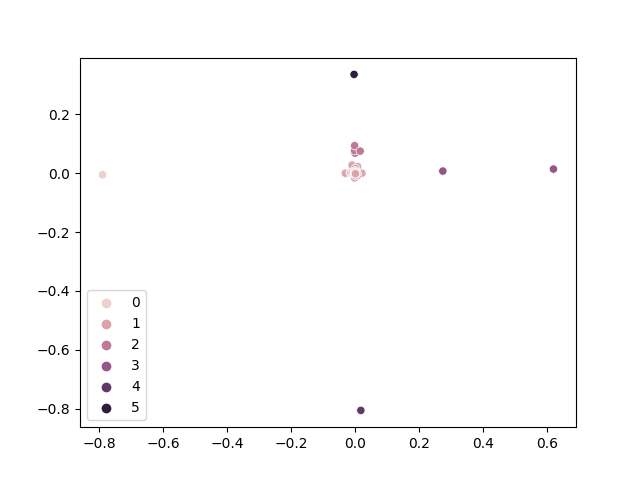

<IPython.core.display.Javascript object>


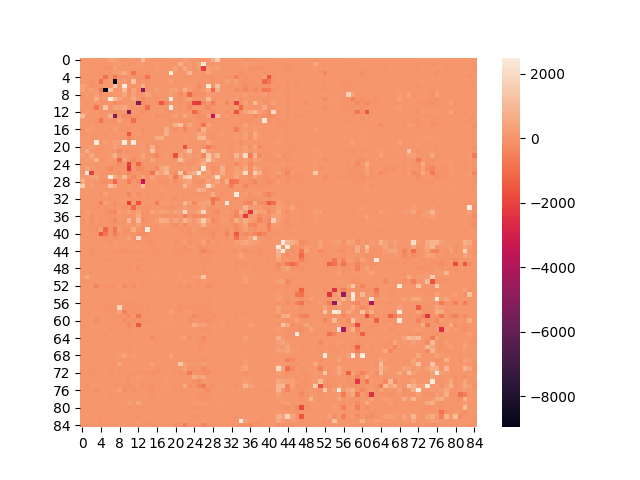

<IPython.core.display.Javascript object>


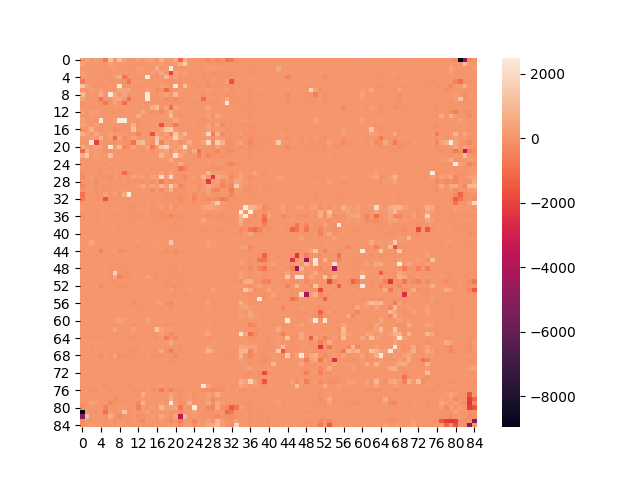

In [173]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import os
import re
import csv
import numpy as np
from sklearn.cluster import KMeans
path = '/home/mariano/data/MRgFUS/Connectomics_AblationPreTx/'
bl_name = 'Pre'
fu_name = 'Tx'

conn_subs = sorted([
    sub for sub in os.listdir(path)
    if os.path.isdir(os.path.join(path, sub)) and re.search(r'\d+', sub) is not None
])
mean_conn = np.zeros((85, 85))
sqexp_conn = np.zeros((85, 85))
for sub in conn_subs:
    bl_path = os.path.join(path, sub, bl_name)
    fu_path = os.path.join(path, sub, fu_name)
    bl_conn_file = os.path.join(
        bl_path, 
        [
            file for file in os.listdir(bl_path)
            if 'Connectome' in file
        ][0]
    )
    fu_conn_file = os.path.join(
        fu_path, 
        [
            file for file in os.listdir(fu_path)
            if 'Connectome' in file
        ][0]
    )
    bl_conn = np.genfromtxt(bl_conn_file, delimiter=',')
    fu_conn = np.genfromtxt(fu_conn_file, delimiter=',')
    
    sub_conn = fu_conn - bl_conn
    mean_conn += sub_conn / len(conn_subs)
    sqexp_conn += sub_conn * sub_conn / len(conn_subs)
    sub_conn = sub_conn / np.abs(sub_conn).max()

stdev_conn = np.sqrt(sqexp_conn - mean_conn * mean_conn)
#plt.figure()
#sn.heatmap(mean_conn)
#plt.figure()
#sn.heatmap(mean_conn, mask=np.logical_and(mean_conn < np.std(mean_conn), mean_conn > -np.std(mean_conn)))
#plt.figure()
#sn.heatmap(stdev_conn)
laplacian_mean = -mean_conn / np.max(mean_conn)
nodes = list(range(len(mean_conn)))
for i in nodes:
    laplacian_mean[i, i] = - np.sum(laplacian_mean[:, i])
plt.figure()
sn.heatmap(np.abs(laplacian_mean))

classes = 6
w, v = np.linalg.eig(laplacian_mean)
vectors = np.array(v[:, np.argsort(w)[:2]])
warped_nodes = np.matmul(laplacian_mean, vectors)
print(warped_nodes.shape)
kmeans_algorithm = KMeans(n_clusters=classes, init='random')
node_labels = kmeans_algorithm.fit_predict(warped_nodes)
new_order = []
for i in range(classes):
    indices = np.where(node_labels == i)[0]
    class_points = warped_nodes[np.where(node_labels == i)[0], :]
    class_mean = np.mean(class_points, axis=0)
    dist = np.linalg.norm(class_points - class_mean, axis=0)
    # new_order += np.array(indices)[np.argsort(dist)].tolist()
    new_order += indices.tolist()
print(new_order)
plt.figure()
sn.scatterplot(x=warped_nodes[:, 0], y=warped_nodes[:, 1], hue=node_labels)
new_mean_conn = np.copy(mean_conn)
new_mean_conn = new_mean_conn[:, new_order]
new_mean_conn = new_mean_conn[new_order, :]
plt.figure()
sn.heatmap(mean_conn, vmax=2500)
plt.figure()
sn.heatmap(new_mean_conn, vmax=2500)

kmeans_algorithm = KMeans(n_clusters=classes, init='random')